<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compiling-and-training-the-network" data-toc-modified-id="Compiling-and-training-the-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compiling and training the network</a></span></li><li><span><a href="#Making-new-predictions" data-toc-modified-id="Making-new-predictions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Making new predictions</a></span><ul class="toc-item"><li><span><a href="#Map-classes-----&gt;-(m1,-m2)" data-toc-modified-id="Map-classes----->-(m1,-m2)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Map classes ----&gt; (m1, m2)</a></span><ul class="toc-item"><li><span><a href="#Training-and-validation-tests" data-toc-modified-id="Training-and-validation-tests-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Training and validation tests</a></span></li><li><span><a href="#others_exp_pictures" data-toc-modified-id="others_exp_pictures-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>others_exp_pictures</a></span></li></ul></li></ul></li></ul></div>

In [69]:
import sys
import os

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if './src' not in sys.path:
    sys.path.append('./src')
import src.vector_vortex_beams as VVB

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Compiling and training the network

In [59]:
# del classifier
#sizeX=1024
#sizeY=768

num_classes = 15

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a fourth convolutional layer
#classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units=num_classes, activation='softmax'))#sigmoid
# Compiling the CNN for classification problem
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])#binary_crossentropy

In [62]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1/255)

training_set = train_datagen.flow_from_directory(
    './data/simulated 15 classes/training_set_balls_red',
    target_size=(128, 128), batch_size=32, class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    './data/simulated 15 classes/test_set_balls_red',
    target_size=(128, 128), batch_size=32, class_mode='categorical'
)

h = classifier.fit_generator(
    training_set, steps_per_epoch=200,  # 8000
    epochs=5, validation_data=test_set, validation_steps=100  # 2000 steps
)


Found 6057 images belonging to 15 classes.
Found 4210 images belonging to 15 classes.
Epoch 1/5
200/200 [==============================] - 148s 739ms/step - loss: 0.9005 - acc: 0.6523 - val_loss: 0.1115 - val_acc: 0.9672
Epoch 2/5
200/200 [==============================] - 140s 701ms/step - loss: 0.0395 - acc: 0.9898 - val_loss: 0.0114 - val_acc: 0.9975
Epoch 3/5
200/200 [==============================] - 140s 699ms/step - loss: 0.0757 - acc: 0.9759 - val_loss: 0.0186 - val_acc: 0.9975
Epoch 4/5
200/200 [==============================] - 141s 707ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0147 - val_acc: 0.9975
Epoch 5/5
200/200 [==============================] - 141s 707ms/step - loss: 5.3339e-04 - acc: 1.0000 - val_loss: 0.0168 - val_acc: 0.9975


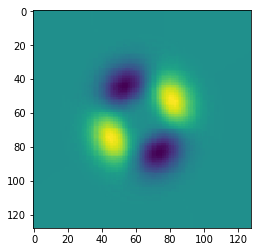

In [70]:
plt.figure()
plt.imshow(training_set[0][0][0][:, :, 0])

In [31]:
classifier.predict()

{'acc': [1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.00012581910353256368,
  0.00010160235668556939,
  0.0001114428246933697,
  6.2799315565435605e-05,
  5.0640735342570123e-05],
 'val_acc': [0.99812500000000004,
  0.99812500000000004,
  0.99812500000000004,
  0.99812500000000004,
  0.99812500000000004],
 'val_loss': [0.01574252773471926,
  0.015447940422664033,
  0.014628414803501072,
  0.013816088490907532,
  0.014428589432220633]}

In [0]:
pathForModels=''
classifier.save(pathForModels+'model_name.h') 
del classifier

## Making new predictions

### Map classes ----> (m1, m2)

#### Training and validation tests

###### c1 --- (-1,1)
###### c2 --- (-3,3)
###### c3 --- (-5,5)
###### c4 --- (-5,-3)
###### c5 --- (-5,-1)
###### c6 --- (-5,1)
###### c7 --- (-5,3)
###### c8 --- (-3,-1)
###### c9 --- (-3,1)
###### c10 --- (-3,5)
###### c11 --- (-1,3)
###### c12 --- (-1,5)
###### c13 --- (1,3)
###### c14 --- (1,5)
###### c15 --- (3,5)

#### others_exp_pictures

###### c1 --- (-5,-3)
###### c2 --- (-5,-1)
###### c3 --- (-5,1)
###### c4 --- (-5,3)
###### c5 --- (-5, 5)
###### c6 --- (-3,-1)
###### c7 --- (-3,1)
###### c8 --- (-3,-3)
###### c9 --- (-3,5)
###### c10 --- (-1,1)
###### c11 --- (-1,3)
###### c12 --- (-1,5)
###### c13 --- (1,3)
###### c14 --- (1,5)
###### c15 --- (3,5)

In [0]:
from keras.models import load_model
pathForModels=''
my_model = load_model(pathForModels+'model_name.h')

In [0]:

# true table

from keras.preprocessing import image
n_classes=15
sum_result=np.zeros(n_classes)
true_table=np.zeros(shape=(n_classes, n_classes))

path=''
for j in range(n_classes):
    n_images = 100
    temp_result=np.zeros((n_images,n_classes))
    for i in range(n_images):
        test_image = image.load_img(path+'c'+str(j+1)+'/c'+str(j+1)+'_ ('+str(i+1)+').jpeg', 
                                    target_size = (128, 128))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)

        temp_result[i] = np.array(my_model.predict(test_image))
        
        #sorting the components 
        temp_result[i] = np.array([temp_result[i,9],temp_result[i,10],temp_result[i,11],
                                   temp_result[i,12],temp_result[i,8],
                                  temp_result[i,13],temp_result[i,14],temp_result[i,7],
                                   temp_result[i,1],temp_result[i,0],
                                  temp_result[i,2],temp_result[i,3],temp_result[i,4],
                                   temp_result[i,5],temp_result[i,6]])
    
    sum_result=np.sum(temp_result,0)
    true_table[j]=sum_result/np.sum(sum_result)


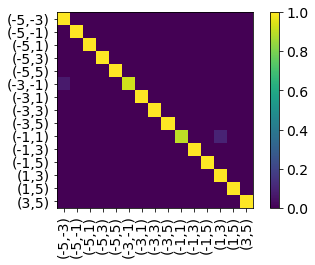

In [0]:
plt.rcParams.update({'font.size': 14})
plt.imshow(true_table )
plt.colorbar()
plt.yticks(np.arange(0,15,1),["(-5,-3)","(-5,-1)","(-5,1)","(-5,3)","(-5,5)","(-3,-1)",
                             "(-3,1)","(-3,3)","(-3,5)","(-1,1)","(-1,3)","(-1,5)","(1,3)"
                             ,"(1,5)","(3,5)"])
plt.xticks(np.arange(0,15,1),["(-5,-3)","(-5,-1)","(-5,1)","(-5,3)","(-5,5)","(-3,-1)",
                             "(-3,1)","(-3,3)","(-3,5)","(-1,1)","(-1,3)","(-1,5)","(1,3)"
                             ,"(1,5)","(3,5)"],rotation='vertical')
plt.margins(0)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.2)
#plt.savefig("table_test_set_exp.pdf")
plt.show()
